## Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

Explanation:

os → access folders

numpy → handle numbers

matplotlib → show images

PIL → open images

In [2]:
# pip install tensorflow

In [3]:
#import tensorflow as tf
#print(tf.__version__)

### Load Dataset

In [4]:
data_dir = "C://Users/nachiket/Desktop/Internship/RiceLeaf_ disease"  # path to extracted folder
classes = os.listdir(data_dir)

print("Classes:", classes)

Classes: ['Bacterial leaf blight', 'Bacterial leaf blight-20200814T055237Z-001.zip', 'Brown spot', 'Brown spot-20200814T055208Z-001.zip', 'Leaf smut', 'Leaf smut-20200814T055530Z-001.zip', 'PRCP-1001-RiceLeaf.docx']


Explanation:

data_dir stores dataset path

os.listdir() shows disease folders

#### Check Images Count

In [5]:
for cls in classes:
    print(cls, ":", len(os.listdir(os.path.join(data_dir, cls))))

Bacterial leaf blight : 40


NotADirectoryError: [WinError 267] The directory name is invalid: 'C://Users/nachiket/Desktop/Internship/RiceLeaf_ disease\\Bacterial leaf blight-20200814T055237Z-001.zip'

Explanation:

Checks number of images per class

Confirms dataset balance

#### Visualize Sample Images

NotADirectoryError: [WinError 267] The directory name is invalid: 'C://Users/nachiket/Desktop/Internship/RiceLeaf_ disease\\Bacterial leaf blight-20200814T055237Z-001.zip'

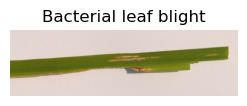

In [6]:
plt.figure(figsize=(10,6))

for i, cls in enumerate(classes):
    img_path = os.path.join(data_dir, cls, os.listdir(os.path.join(data_dir, cls))[0])
    img = Image.open(img_path)
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()


Explanation:

Displays one image from each disease

Helps understand visual patterns

In [7]:
img.size, img.mode

((3081, 897), 'RGB')

## Model Building
#### Image Preprocessing & Augmentation

### Disease Classification Model

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\nachiket\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [9]:
img_size = (224, 224)
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

Explanation:

Rescale → normalize pixel values

Rotation & flip → increase data size

Prevents overfitting

#### Train & Validation Data

In [10]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


Explanation:

Automatically labels images

Splits data into train & validation

### CNN Model Architecture

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


C:\Users\nachiket\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Explanation:

CNN extracts image features

MaxPooling reduces size

Softmax gives class probabilities

#### Compile & Train Model 

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.3750 - loss: 1.9830 - val_accuracy: 0.3478 - val_loss: 1.1042
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3646 - loss: 1.1320 - val_accuracy: 0.5217 - val_loss: 1.0639
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4062 - loss: 1.0517 - val_accuracy: 0.5652 - val_loss: 0.9912
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5000 - loss: 0.9734 - val_accuracy: 0.5652 - val_loss: 0.9011
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5625 - loss: 0.9732 - val_accuracy: 0.5217 - val_loss: 1.0612
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5000 - loss: 0.9160 - val_accuracy: 0.6957 - val_loss: 0.9421
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6875 - loss: 0.7888 - val_accuracy: 0.6957 - val_loss: 0.7212
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6354 - loss: 0.7772 - val_accuracy: 0.6957 - val_loss: 0.9071
Epoch 9/

Explanation:

Adam optimizer → fast learning

Accuracy used for evaluation

### Model Performance Visualization (Model Evaluation)

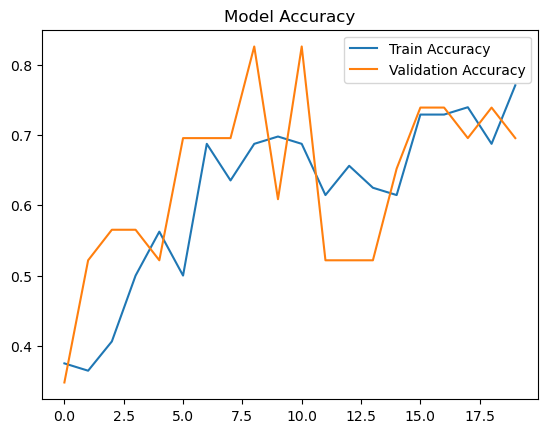

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

Explanation:

Shows learning trend

Checks overfitting

Explanation:

MobileNetV2 → Pre-trained model

GlobalAveragePooling2D → Reduces features

Model → Custom model creation